# OOP: Building Classes
We just learned some of the foundations of Object-Oriented Programming.

Now, we want to dig deeper and 

 - cover OOP in more depth
 - learn how to build our own objects, specialized to our needs
 
For example, we already know how to

 - create lists, strings, and other Python objects
 - use their methods to modify their content
 
So, now let's imagine we want to write a program with consumers, who can

 - hold and spend cash
 - consume goods
 - work and earn cash
 
A natural solution in Python would be to create consumers as objects with

 - data, such as cash on hand
 - methods, such as `buy` or `work` that affect this data
 
Python makes it easy to do this, by providing us with __class definitions__.

Classes are blueprints that help us build objects according to our own specifications.

We start with the following imports:

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)

## OOP Review
In the OOP paradigm, data and functions are __bundled together__ into "objects".

An example is a Python list, which not only stores data but also knows how to sort itself, etc.

In [8]:
x = [1, 5, 4]
x.sort()
x

[1, 4, 5]

`sort` is a function that is part of the list object - and hence called a _method_.

If we want to make our own types of objects, we need to use class definitions.

A _class definition_ is a blueprint for a particular class of objects (e.g., lists or strings).

It describes

 - what kind of data the class stores
 - what methods it has for acting on these data
 
An _object_ or _instance_ is a realization of the class, created from the blueprint

 - each instance has its own unique data
 - methods set out in the class definition act on this (and other) data
 
In Python, the data and methods of an object are collectively referred to as _attributes_.

Attributes are accessed via "dotted attribute notation":

 - `object_name.data`
 - `object_name.method_name()`

In the example:

In [11]:
x = [1, 5, 4]
x.sort()
x.__class__

list

 - `x` is an object or instance, created from the definition for Python lists, but with its own particular data
 - `x.sort()` and `x.__class__` are two attributes of `x`
 - `dir(x)` can be used to view all the atributes of `x`

### Why is OOP useful?
OOP is useful for the same reason that abstraction is useful: for recognizing and exploiting common structure.

Recognizing common structure allows us to employ common tools.

In economic theories, for example, this could be a proposition that applies to all games of a certain type.

In Python, this might be a method that is useful for all _Markov chains_ (e.g., `simulate`).

When we use OOP, the `simulate` method is conveniently bundled together with the Markov chain object.

## Defining your own classes
Before we build our own classes, in order to indicate some of the power of Classes, we will define two functions that we will call `earn` and `spend`:

In [14]:
def earn(w,y):
    "Consumer with initial wealth w earns y"
    return w+y

def spend(w,x):
    "Consumer with initial wealth w spends x"
    new_wealth = w - x
    if new_wealth < 0:
        print("Insufficient funds")
    else:
        return new_wealth

The `earn` function takes a consumer's initial wealth $w$ and adds to it her current earnings $y$.

The `spend` function takes a consumer's initial wealth $w$ and deducts from it her current spending $x$.

We can use these two functions to keep track of a consumer's wealth as she earns and spends.

For example:

In [17]:
w0 = 100
w1 = earn(w0,10)
w2 = spend(w1, 20)
w3 = earn(w2, 10)
w4 = spend(w3, 20)
print("w0,w1,w2,w3,w4 = ", w0, w1, w2, w3, w4)

w0,w1,w2,w3,w4 =  100 110 90 100 80


A _Class_ bundles a set of data tied to a particular _instance_ together with a collection of functions that operate on the data.

In our example, an _instance_ will be the name of a particular _consumer_ whose _instance data_ consists solely of her wealth.

The two functions `earn` and `spend` can be applied to the current instance data.

Taken together, the instance data and functions are called _methods_.

These can be readily accessed in ways that we will discuss below.

### Example: A Consumer Class
We will now build a `Consumer` class with

 - a `wealth` attribute that stores the consumer's wealth (data)
 - an `earn` method, where `earn(y)` increments the consumer's wealth by `y`
 - a `spend` method, where `spend(x)` either decreases wealth by `x` or returns an error if insufficient funds exist

Here is how we set up our Consumer class:

In [20]:
class Consumer:
    
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y
        
    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print("Insufficient funds")
        else:
            self.wealth = new_wealth

There is some special syntax:

 - the `class` keyword indicates that we are building a class

The `Consumer` class defines instance data `wealth` and three methods: `__init__`, `earn`, and `spend`

 - `wealth` is instance data because each consumer we create (each instance of the `Consumer` class) will have its own wealth data
 
The `earn` and `spend` methods deploy the functions we described earlier and that can potentially be applied to the `wealth` instance data.

The `__init__` method is a _constructor method_.

Whenever we create an instance of the class, the `__init__` method will be called automatically.

Calling `__init__` sets up a namespace to hold the instance data.

We will discuss the role of the peculiar `self` bookkeeping device in detail below.

#### Usage
Let's see an example in which we use the class `Consumer` to create an instance of a consumer who we affectionately call $c1$.

After we create consumer $c1$ and endow it with initial wealth 10, we will apply the `spend` method.

In [23]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [25]:
c1.earn(15)
c1.spend(100)

Insufficient funds


We can create multiple instances, i.e., multiple consumers, each with its own name and data.

In [28]:
c1 = Consumer(10)
c2 = Consumer(12)
c2.spend(4)
c2.wealth

8

In [30]:
c1.wealth

10

Each instance (each consumer) stores its data in a separate namespace dictionary

In [33]:
c1.__dict__

{'wealth': 10}

In [35]:
c2.__dict__

{'wealth': 8}

When we access or set attributes, we are actually just modifying the dictionary maintained by the instance.

#### Self
If you look at the `Consumer` class definition, you will see the word _self_ throughout the code.

The rules for using `self` in creating a class are that 

 - any instance data should be prepended with `self`
   
     - e.g., the `earn` method uses `self.wealth` rather than just `wealth`
       
 - a method defined within the code that defines the class should have `self` as its first argument
   
     - e.g., `def earn(self,y)` rather than just `def earn(y)`
       
 - any method referenced within the class should be called as `self.method_name`
 
There are no example of the last rule in the preceding code, but we will see some shortly.

#### Details
We will now look at some more formal details related to classes and `self`.

 - some of these details may become clearer after some more examples that we are going to cover

Methods actually live inside a class object formed when the interpreter reads the class definition

In [38]:
print(Consumer.__dict__) # show __dict__ attribute of class object

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x00000160A8489B20>, 'earn': <function Consumer.earn at 0x00000160A8489BC0>, 'spend': <function Consumer.spend at 0x00000160A8489E40>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


Note, how the three methods `__init__`, `earn`, and `spend` are stored in the class object.

Consider the following code:

In [41]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

When you call `earn` via `c1.earn(10)` the interpreter passes the instance `c1` and the argument `10` to `Consumer.earn`.

In fact, the following are equivalent:
 1. `c1.earn(10)`
 2. `Consumer.earn(c1,10)`
 
In the function call `Consumer.earn(c1,10)` note that `c1` is the first argument.

Recall that in the definition of the `earn` method, `self` is the first parameter.
```python
    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y
```

The end result is that `self` is bound to the instance `c1` inside the function call.

That's why the statement `self.wealth += y` inside `earn` ends up modifying `c1.wealth`.

### Example: The Solow Growth Model
In this next example, we are writing a simple class to implement the Solow growth model. Here, the focus is on the computational/coding part.

The Solow growth model is a neoclassical growth model in which the per capita capital stock $k_t$ evolves according to the rule:
$$ k_{t+1} = \frac{s z k_t^{\alpha} + (1-\delta)k_t}{1+n}, $$
where:
 - $s$ is an exogenously given savings rate
 - $z$ is a productivity parameter
 - $\alpha$ is the income share of capital
 - $n$ is the population growth rate
 - $\delta$ is the depreciation rate.
 
A __steady state__ of the model is a $k$ that solves the above equation when $k_{t+1} = k_t = k$.

## Exercise to do in class
Solve for the steady state (you don't need Python to do this, but you can try it if you want).
When are at point remain there so $k_t= $k_(t+1)



### Solution:
will be discussed during the lecture

My thoughts: k to solve equation
isolate k- drop the time subscripts
z constant no tech change
savings is investment 

k(1+n)

k+kn = szK - ($\delta) k

k(n+($\delta))=szk** $\alpha

divide and isolate k

k=((sz/(n+$\delta))**((1/1-($alpha$)))

### Solution:

$$(1+n)k = szk^{\alpha}+(1-\delta)k $$
$$\Leftrightarrow (n+\delta)k = sz k^{\alpha}$$
$$\Leftrightarrow k^{1-\alpha} = \frac{sz}{n+\delta} $$
$$\Leftrightarrow k = \left(\frac{sz}{n+\delta} \right)^{\frac{1}{1-\alpha}} $$



The class below implements that model.

Some points of interest in the code:
 - an instance maintains a record of its current capital stock in the variable `self.k`,, state variable instance state
 - the `h` method implements the right-hand side of the above equation 
 - the `update` method uses `h` to update capital following the above equation
     - note, how inside `update` the reference to the local method `h` is `self.h`
     


In [2]:
# Solve it with Python:
from sympy import symbols, Eq, solve

# Define variables
k, s, z, alpha, delta, n = symbols('k s z alpha delta n') 

# Define the equation
equation = Eq(k, (s * z * k**alpha + (1 - delta) * k) / (1 + n))

# Solve for k
solution = solve(equation, k)

# Print the solution
print(solution)

[(s*z/(delta + n))**(-1/(alpha - 1))]


In [69]:
class Solow:
    """
    Implements the Solow growth model with the update rule
    
    k_{t+1} = [(s z k^α_t) + (1-δ) k_t]/(1+n)
    """
    def __init__(self, n = 0.05, # population growth rate
                       s = 0.25, # savings rate
                       δ = 0.1, # depreciation rate
                       α = 0.3, # capital share
                       z = 2.0, # productivity
                       k = 1.0): # current capital stock
        self.n, self.s, self.δ, self.α, self.z = n, s, δ, α, z
        self.k = k
        
    def h(self):
        "Evaluate the h function"
        # Unpack parameters (get rid of self to simplify the notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # apply the update rule
        return (s * z * self.k**α + (1-δ) * self.k)/(1+n)
    
    def update(self):
        "Update the current state (i.e., the capital stock)"
        self.k = self.h()
        
    def steady_state(self):
        "Compute the steady state value of capital"
        # Unpack parameters (get rid of self to simplify the notation)
        n, s, δ, α, z = self.n, self.s, self.δ, self.α, self.z
        # Compute and return steady state:
        return ((s * z) / (n+δ))**(1/(1-α))
    
    def generate_sequence(self,t):
        "Generate and return a time series of length t"
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path

Let's see an example where we use the Solow class to compute time series of the capital stock from two different initial conditions (we also plot the steady state, which is independent of the initial condition).

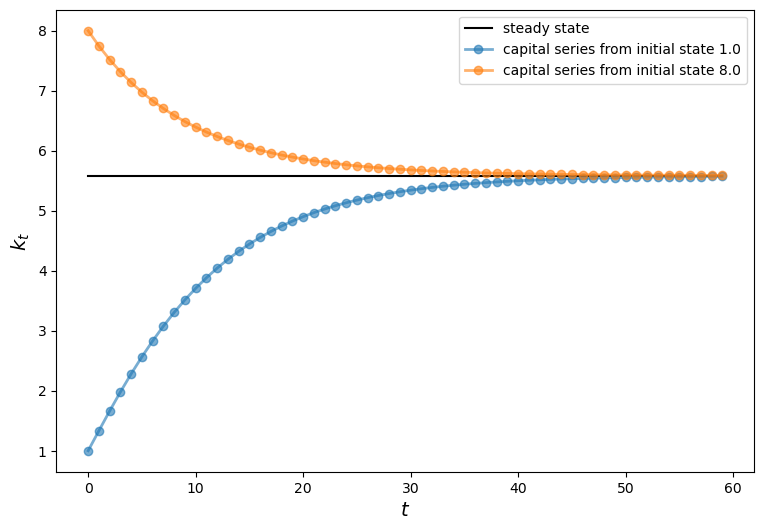

In [75]:
s1 = Solow() #default parameter
s2 = Solow(k = 8.0) #changing starting capital stock

T = 60
fig, ax = plt.subplots(figsize=(9,6))

# Plot the common steady state value of capital
ax.plot([s1.steady_state()]*T, 'k', label = 'steady state')

# Plot the time series for both economies
for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw = 2, alpha = 0.6, label = lb) #using method to generate sequence and plot, shape, width, labels
    
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

### Exercise to do in class:

What happens when you decrease the savings rate $s$?

Taking derivative of steady state with respect to s.
(1/(1-$\alpha$) ((z/($\delta$+n)) s**(($\alpha$/(1-$\alpha$)

Look at code on canvas

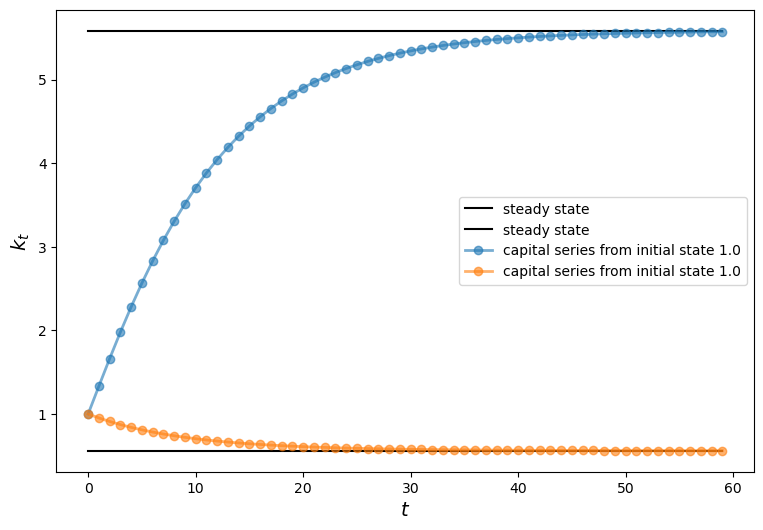

In [104]:
#Decreasing the savings rate  will decrease the steady state 
s3= Solow()
s4= Solow(s=.05)

T=60
fig, ax = plt.subplots(figsize=(9,6))

# Plot the common steady state value of capital
ax.plot([s3.steady_state()]*T, 'k', label = 'steady state')
ax.plot([s4.steady_state()]*T, 'k', label = 'steady state')

# Plot the time series for both economies
for s in s3, s4:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T), 'o-', lw = 2, alpha = 0.6, label = lb) #using method to generate sequence and plot, shape, width, labels
    
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()

### Example: A Market
We are now looking at another economic example: a competitive market in which buyers and sellers are both price takers.

The market consists of the following objects:
 - a linear demand curve $Q = a_d - b_d p$
 - a linear supply curve $Q = a_z + b_z (p-t)$,
 
where
 - $p$ is the price paid by the buyer, $Q$ is the quantity and $t$ is a per-unit tax
 - other symbols are demand and supply parameters (intercept and slope of the two linear curves)
 
The following class provides methods to compute various values of interest, including competitive equilbrium price and quantity, tax revenue raised, consumer surplus and producer surplus.

(We use the function `quad` from SciPy for numerical integration to get the consumer and producer surplus.)

isolating price in equation ,, plot demand function with slope -1/$b_d$ and intercept ($a_d/b_d$)

isolating price in equation,, plot supply curve fucntion with slope (a/$b_z$) and intercept $(-a_z/b_z)$

tax shifts in supply curve,, solve for equili price and q 

equili price: demand =supply

$a_d-b_ap$=$a_z + b_z(p-t)$

solve for p

tax rev is equili quantity * tax, generate ps cs and dwl

using classic econ graph with supply, demand, equili to compute these values in a way with functions

integrating below curves up to certain points



In [133]:
from scipy.integrate import quad
# quad function helps compute integration
class Market:
    
    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters. 
        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az: #checks if there is an equilibrium
            raise ValueError('Insufficient demand.')
            
    def price(self):
        "Compute equilibrium price"
        return (self.ad - self.az + self.bz*self.tax)/(self.bd + self.bz)
    
    def quantity(self):
        "Compute equilibrium quantity"
        #referencing demand curve 
        return self.ad - self.bd * self.price()
    
    def consumer_surp(self):
        "Compute consumer surplus"
        # compute the area under the inverse demand function
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x  #demand curve
        area, error = quad(integrand, 0, self.quantity())      #integrate whole piece under demand curve
        return area - self.price() * self.quantity()   #subtract out tax rev and PS to get CS
    
    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1 / self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area
    
    def tax_rev(self):
        "Comoute tax revenue"
        return self.tax * self.quantity()
    
    def inverse_demand(self, x):
        "Comoute inverse demand"
        return self.ad / self.bd - (1/self.bd)*x
    
    def inverse_supply(self,x):
        "compute inverse supply curve"
        return -(self.az/self.bz) + (1/self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self,x): #just a shift in the supply based on tax or no tax 
        "compute invserse supply curve without tax"
        return -(self.az/self.bz) + (1/self.bz) * x

Let's see an example:

In [136]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [62]:
print("consumer surplus =", m.consumer_surp())

consumer surplus = 33.0625


Let's write a short program that uses this class to plot an inverse demand curve together with inverse supply curves with and without taxes.

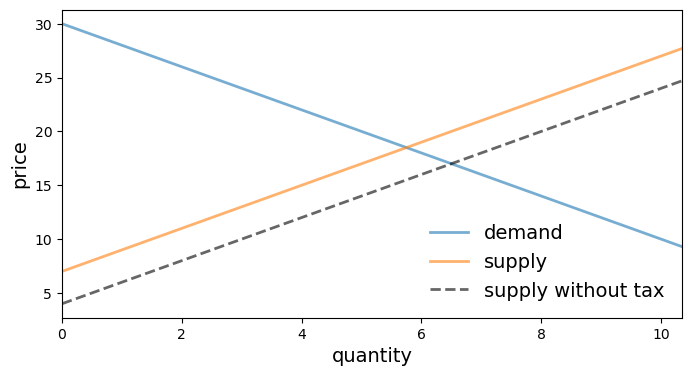

In [138]:
# Baseline ad, bd, az, bz, tax
baseline_params = 15, .5, -2, .5, 3  #feeding in x quantity values and compute prices for each point
m = Market(*baseline_params)

q_max = m.quantity()*1.8               #want q max to be beyond q value to be visually better
q_grid = np.linspace(0.0, q_max, 100)  #grid keeps q points from 0 to max with n=100, linear grid created 
pd = m.inverse_demand(q_grid)          #for each point compute demand price
ps = m.inverse_supply(q_grid)          #compute supply prices
psno = m.inverse_supply_no_tax(q_grid) #also showing supply with no tax

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw = 2, alpha = 0.6, label = 'demand')
ax.plot(q_grid, ps, lw=2, alpha = 0.6, label = 'supply')
ax.plot(q_grid, psno, '--k', lw = 2, alpha = 0.6, label = 'supply without tax') #dashed line on graph for no tax supply 
ax.set_xlabel('quantity', fontsize = 14)
ax.set_xlim(0, q_max)            #limit of graph go from 0 to q max
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon = False, fontsize = 14)  #includes a legend 
plt.show()

The next program provides a function that
 - takes an instance of `Market` as a parameter
 - computes the dead weight loss from the tax


In [140]:
def deadw(m):
    "Creates deadweight loss for market m"
    # create analogous market with no tax
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)  #same parameters as m but t=0 now 
    # compare surplus, return difference
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.tax_rev()
    return surp1 - surp2

In [142]:
deadw(m)

1.125

### Example: Chaos
We are now going to look at another example: chaotic dynamics in nonlinear systems.

A transition rule that can lead to erratic time paths is the logistic map
$$ x_{t+1} = rx_t(1-x_t), \text{ } x_0 \in [0,1], \text{ } r \in [0,4].$$

Let's write a class for generating time series from this model.

In [146]:
class Chaos:
    """
    Models the dynamical system x_{t+1} = r x_t(1-x_t)
    """
    def __init__(self, x0, r):
        """ 
        Initialize with state x0 and parameter r
        """
        self.x, self.r = x0, r
        
    def update(self):
        "Apply the map to update state"
        self.x = self.r*self.x*(1-self.x)
        
    def generate_sequence(self, n):
        "Generate and return a sequence of length n"
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

Let's make an example.

In [149]:
ch = Chaos(0.1, 4.0)
ch.generate_sequence(5)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

Let's plot a longer trajectory:

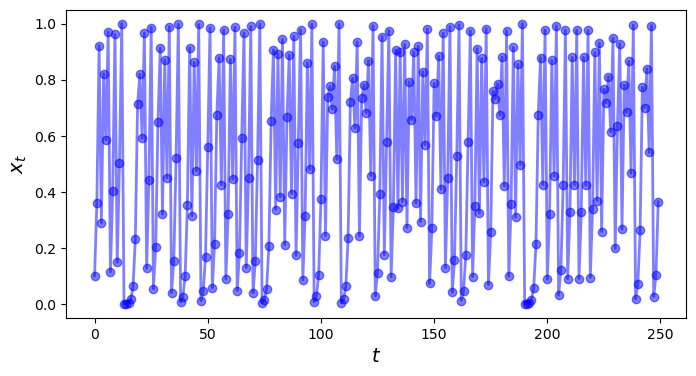

In [152]:
ch = Chaos(0.1, 4)    #oscalating btwn steady states 
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize = 14)
ax.set_ylabel('$x_t$', fontsize = 14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length), x, 'bo-', alpha = 0.5, lw = 2, label = '$x_t$')
plt.show()

The next piece of code provides a bifurcation diagram:
computing the time series for given r and plotting the last 50 points to see where we go for particular r, then extrapolate to many r values 

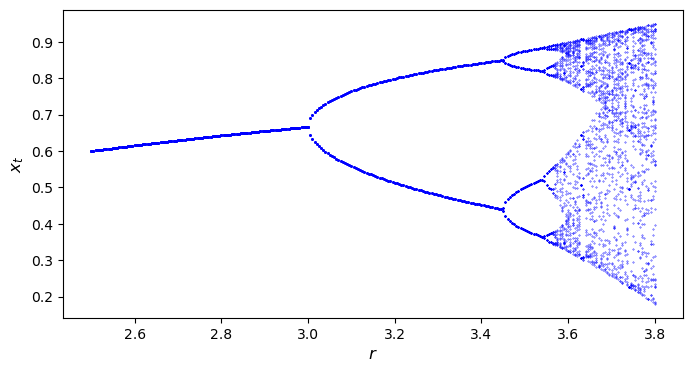

In [161]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 3.8)
r = 2.5
while r < 3.8:  #loop up to values 3.5 to see where r goes
    ch.r = r    #set to original r
    t = ch.generate_sequence(1000)[950:]   #generate a sequence of length 1000 only keep last 50 oberservations 
    ax.plot([r]*len(t), t, 'b.', ms = 0.6) #plot the last 50 periods to see movement
    r = r + 0.005  #update r 

ax.set_xlabel('$r$', fontsize = 12)  #r on the x acess
ax.set_ylabel('$x_t$', fontsize = 12) # t on the y access
plt.show()

#if converge to steady state all the point the same ,,, once get to r 3.8 starts moving with points all over the place.
# r to 3.4 was oscaltating, then intermediate range btwn 4 points, then get major chaotic behavior or r jumping around 

ex: plot using market parameters to generate series for different Ad, what is equili price by plotting? 

On the horizontal axis is the parameter $r$.

The vertical axis is the state space $[0,1]$.

For each $r$, we compute a long time series and then plot the tail (the last 50 points).

The tail of the sequence shows us where the trajectory concentrates after settling down to somme kind of steady state, if a steady state exists.

Whether it settles down, and the character of the steady state to which it does settle down, depends on the value of $r$.

For $r$ between about 2.5 and 3, the time series settles into a single fixed point plotted on the vertical axis.

For $r$ between about 3 and 3.45, the time series settles down to oscillating between two value plotted on the vertical axis.

For $r$ a bit higher than 3.45, the time series settles down to oscillating among four values.